In [1]:
import dipy

In [2]:
from dipy.io.image import load_nifti, save_nifti
from dipy.io.gradients import read_bvals_bvecs

In [3]:
from fenics import *
from mshr import *
#from math import pi, sin, cos, sqrt
import math
import matplotlib.pyplot as plt
import numpy as np
import nibabel as nib
import os

In [4]:
fname = 'dMRI_data/ss-ras_data.nii.gz' 
bval_fname = 'dMRI_data/ss-ras.bval' 
bvec_fname = 'dMRI_data/ss-ras.bvec'

data, affine = load_nifti(fname)
bvals, bvecs = read_bvals_bvecs(bval_fname, bvec_fname)
print('data.shape (%d, %d, %d, %d)' % data.shape)

data_float = data.astype(np.float32)

dataMaxVal = int(max(data.flatten()))
dataMinVal = int(min(data.flatten()))

print('b values: ', bvals)
print('b vectors: ', bvecs)

data.shape (104, 104, 72, 32)
b values:  [  0. 700. 700. 700. 700. 700. 700. 700. 700. 700. 700. 700. 700. 700.
 700. 700. 700. 700. 700. 700. 700.   0. 700. 700. 700. 700. 700. 700.
 700. 700. 700. 700.]
b vectors:  [[ 0.          0.          0.        ]
 [ 0.22293058 -0.49968055 -0.83703119]
 [-0.17871778 -0.49333411 -0.85128242]
 [-0.37542525 -0.14225766 -0.91587037]
 [ 0.41157657 -0.72193778 -0.556247  ]
 [ 0.19853516 -0.93616748 -0.29012811]
 [ 0.84751403 -0.52907634 -0.04240569]
 [ 0.73912424 -0.51868695 -0.42972025]
 [ 0.43850514 -0.15385152 -0.88546205]
 [ 0.75664991 -0.17243032 -0.63067305]
 [ 0.62896943 -0.74815804  0.21132247]
 [ 0.30347744 -0.94898587  0.0855993 ]
 [ 0.28489485 -0.54959691  0.78535217]
 [ 0.62077832 -0.54730117  0.56133366]
 [ 0.97062433 -0.19699152  0.13814011]
 [ 0.83273727 -0.20222756  0.51541471]
 [-0.03439669 -0.75075191  0.65968806]
 [-0.02572841 -0.94997877  0.31125325]
 [-0.68088585 -0.5256443   0.50999278]
 [-0.36761704 -0.53581387  0.76010603]
 [-

In [5]:
parameters['allow_extrapolation'] = True

In [6]:
#center = Point(0.0, 0.0, 0.0)
#sphere = Sphere(center,1.0)
#mesh = generate_mesh(sphere,20) # 20 specify the resolution of the mesh
#plot(mesh)

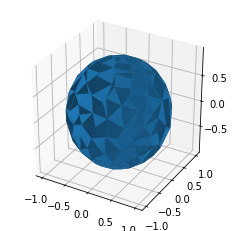

In [7]:
# Mesh and function space
#sphere = Sphere(Point(0.0, 0.0, 0.0), 1.0) 
##vmesh = generate_mesh(sphere, 5)
#mesh = generate_mesh(sphere, 5)
##mesh = BoundaryMesh(vmesh, "exterior")
#File("LH/mesh_whole_sphere1111.xml") << mesh
#plot(mesh)

#mesh = Mesh('LH/mesh_whole_sphere.xml')
#mesh = Mesh('LH/mesh.xml')

#mesh = Mesh('LH/mesh_whole_sphere_myself.xml')
mesh = Mesh('LH/mesh_on_sphere_myself.xml')
plot(mesh)

In [8]:
print(mesh.topology().dim())
print(mesh.geometry().dim())

2
3


In [9]:
# Define DC boundary condition
#tol = 0.03
#def boundary1(x, on_boundary):
#    if abs(x[0]-bvecs[1][0]) < tol and abs(x[1]-bvecs[1][1]) < tol and abs(x[2]-bvecs[1][2]) < tol:
#        print("b vector 1: ", x[0], x[1], x[2], sqrt(x[0]*x[0]+x[1]*x[1]+x[2]*x[2]))
#    elif abs(x[0]+bvecs[1][0]) < tol and abs(x[1]+bvecs[1][1]) < tol and abs(x[2]+bvecs[1][2]) < tol:
#        print("b vector 1: ", x[0], x[1], x[2], sqrt(x[0]*x[0]+x[1]*x[1]+x[2]*x[2]))
#    return (abs(x[0]-bvecs[1][0]) < tol and abs(x[1]-bvecs[1][1]) < tol and abs(x[2]-bvecs[1][2]) < tol) or (abs(x[0]+bvecs[1][0]) < tol and abs(x[1]+bvecs[1][1]) < tol and abs(x[2]+bvecs[1][2]) < tol)

#def boundary14(x, on_boundary):
#    if abs(x[0]-bvecs[14][0]) < tol and abs(x[1]-bvecs[14][1]) < tol and abs(x[2]-bvecs[14][2]) < tol:
#        print("b vector 14: ", x[0], x[1], x[2], sqrt(x[0]*x[0]+x[1]*x[1]+x[2]*x[2]))
#    elif abs(x[0]+bvecs[14][0]) < tol and abs(x[1]+bvecs[14][1]) < tol and abs(x[2]+bvecs[14][2]) < tol:
#        print("b vector 14: ", x[0], x[1], x[2], sqrt(x[0]*x[0]+x[1]*x[1]+x[2]*x[2]))
#    return (abs(x[0]-bvecs[14][0]) < tol and abs(x[1]-bvecs[14][1]) < tol and abs(x[2]-bvecs[14][2]) < tol) or (abs(x[0]+bvecs[14][0]) < tol and abs(x[1]+bvecs[14][1]) < tol and abs(x[2]+bvecs[14][2]) < tol)

#def boundary17(x, on_boundary):
#    if abs(x[0]-bvecs[17][0]) < tol and abs(x[1]-bvecs[17][1]) < tol and abs(x[2]-bvecs[17][2]) < tol:
#        print("b vector 17: ", x[0], x[1], x[2], sqrt(x[0]*x[0]+x[1]*x[1]+x[2]*x[2]))
#    elif abs(x[0]+bvecs[17][0]) < tol and abs(x[1]+bvecs[17][1]) < tol and abs(x[2]+bvecs[17][2]) < tol:
#        print("b vector 17: ", x[0], x[1], x[2], sqrt(x[0]*x[0]+x[1]*x[1]+x[2]*x[2]))
#    return (abs(x[0]-bvecs[17][0]) < tol and abs(x[1]-bvecs[17][1]) < tol and abs(x[2]-bvecs[17][2]) < tol) or (abs(x[0]+bvecs[17][0]) < tol and abs(x[1]+bvecs[17][1]) < tol and abs(x[2]+bvecs[17][2]) < tol)

#def boundary20(x, on_boundary):
#    if abs(x[0]-bvecs[20][0]) < tol and abs(x[1]-bvecs[20][1]) < tol and abs(x[2]-bvecs[20][2]) < tol:
#        print("b vector 20: ", x[0], x[1], x[2], sqrt(x[0]*x[0]+x[1]*x[1]+x[2]*x[2]))
#    elif abs(x[0]+bvecs[20][0]) < tol and abs(x[1]+bvecs[20][1]) < tol and abs(x[2]+bvecs[20][2]) < tol:
#        print("b vector 20: ", x[0], x[1], x[2], sqrt(x[0]*x[0]+x[1]*x[1]+x[2]*x[2]))
#    return (abs(x[0]-bvecs[20][0]) < tol and abs(x[1]-bvecs[20][1]) < tol and abs(x[2]-bvecs[20][2]) < tol) or (abs(x[0]+bvecs[20][0]) < tol and abs(x[1]+bvecs[20][1]) < tol and abs(x[2]+bvecs[20][2]) < tol)

#def boundary22(x, on_boundary):
#    if abs(x[0]-bvecs[22][0]) < tol and abs(x[1]-bvecs[22][1]) < tol and abs(x[2]-bvecs[22][2]) < tol:
#        print("b vector 22: ", x[0], x[1], x[2], sqrt(x[0]*x[0]+x[1]*x[1]+x[2]*x[2]))
#    elif abs(x[0]+bvecs[22][0]) < tol and abs(x[1]+bvecs[22][1]) < tol and abs(x[2]+bvecs[22][2]) < tol:
#        print("b vector 22: ", x[0], x[1], x[2], sqrt(x[0]*x[0]+x[1]*x[1]+x[2]*x[2]))
#    return (abs(x[0]-bvecs[22][0]) < tol and abs(x[1]-bvecs[22][1]) < tol and abs(x[2]-bvecs[22][2]) < tol) or (abs(x[0]+bvecs[22][0]) < tol and abs(x[1]+bvecs[22][1]) < tol and abs(x[2]+bvecs[22][2]) < tol)

#def boundary29(x, on_boundary):
#    if abs(x[0]-bvecs[29][0]) < tol and abs(x[1]-bvecs[29][1]) < tol and abs(x[2]-bvecs[29][2]) < tol:
#        print("b vector 29: ", x[0], x[1], x[2], sqrt(x[0]*x[0]+x[1]*x[1]+x[2]*x[2]))
#    elif abs(x[0]+bvecs[29][0]) < tol and abs(x[1]+bvecs[29][1]) < tol and abs(x[2]+bvecs[29][2]) < tol:
#        print("b vector 29: ", x[0], x[1], x[2], sqrt(x[0]*x[0]+x[1]*x[1]+x[2]*x[2]))
#    return (abs(x[0]-bvecs[29][0]) < tol and abs(x[1]-bvecs[29][1]) < tol and abs(x[2]-bvecs[29][2]) < tol) or (abs(x[0]+bvecs[29][0]) < tol and abs(x[1]+bvecs[29][1]) < tol and abs(x[2]+bvecs[29][2]) < tol)

In [10]:
#V = FunctionSpace(mesh, "CG", 2)
V = FunctionSpace(mesh, "P", 1)

#bc1 = DirichletBC(V, Constant(data_float[63,54,30,1]), boundary1)
#bc22 = DirichletBC(V, Constant(90.0), boundary22)
#bc14 = DirichletBC(V, Constant(10.0), boundary14)
#bc29 = DirichletBC(V, Constant(160.0), boundary29)
#bc17 = DirichletBC(V, Constant(200.0), boundary17)
#bc20 = DirichletBC(V, Constant(260.0), boundary20)

# Collect boundary conditions
#bcs = [DirichletBC(V, Constant(data_float[63,54,30,1]), boundary1), DirichletBC(V, Constant(data_float[63,54,30,14]), boundary14)]
#bcs = [DirichletBC(V, Constant(data_float[63,54,30,1]), boundary1, method="pointwise"), 
#       DirichletBC(V, Constant(data_float[63,54,30,14]), boundary14, method="pointwise"),
#       DirichletBC(V, Constant(data_float[63,54,30,17]), boundary17, method="pointwise"),
#       DirichletBC(V, Constant(data_float[63,54,30,20]), boundary20, method="pointwise"),
#       DirichletBC(V, Constant(data_float[63,54,30,22]), boundary22, method="pointwise"),
#       DirichletBC(V, Constant(data_float[63,54,30,29]), boundary29, method="pointwise"),]

# get coordinates of DOFs
dof_coords = V.tabulate_dof_coordinates()

#Extend DOFs
#dof_coords = np.vstack([dof_coords, bvecs[1]])
#dof_coords = np.vstack([dof_coords, -bvecs[1]])
#dof_coords = np.vstack([dof_coords, bvecs[14]])
#dof_coords = np.vstack([dof_coords, -bvecs[14]])
#dof_coords = np.vstack([dof_coords, bvecs[17]])
#dof_coords = np.vstack([dof_coords, -bvecs[17]])
#dof_coords = np.vstack([dof_coords, bvecs[20]])
#dof_coords = np.vstack([dof_coords, -bvecs[20]])
#dof_coords = np.vstack([dof_coords, bvecs[22]])
#dof_coords = np.vstack([dof_coords, -bvecs[22]])
#dof_coords = np.vstack([dof_coords, bvecs[29]])
#dof_coords = np.vstack([dof_coords, -bvecs[29]])

# find nearest DOF:
dof1 = np.argmin(np.linalg.norm(dof_coords - bvecs[1], axis=1))
print('dof {}, x = {}'.format(dof1, dof_coords[dof1]))
dof1_sym = np.argmin(np.linalg.norm(dof_coords + bvecs[1], axis=1))
print('dof {}, x = {}'.format(dof1_sym, dof_coords[dof1_sym]))

dof14 = np.argmin(np.linalg.norm(dof_coords - bvecs[14], axis=1))
print('dof {}, x = {}'.format(dof14, dof_coords[dof14]))
dof14_sym = np.argmin(np.linalg.norm(dof_coords + bvecs[14], axis=1))
print('dof {}, x = {}'.format(dof14_sym, dof_coords[dof14_sym]))

dof17 = np.argmin(np.linalg.norm(dof_coords - bvecs[17], axis=1))
print('dof {}, x = {}'.format(dof17, dof_coords[dof17]))
dof17_sym = np.argmin(np.linalg.norm(dof_coords + bvecs[17], axis=1))
print('dof {}, x = {}'.format(dof17_sym, dof_coords[dof17_sym]))

dof20 = np.argmin(np.linalg.norm(dof_coords - bvecs[20], axis=1))
print('dof {}, x = {}'.format(dof20, dof_coords[dof20]))
dof20_sym = np.argmin(np.linalg.norm(dof_coords + bvecs[20], axis=1))
print('dof {}, x = {}'.format(dof20_sym, dof_coords[dof20_sym]))

dof22 = np.argmin(np.linalg.norm(dof_coords - bvecs[22], axis=1))
print('dof {}, x = {}'.format(dof22, dof_coords[dof22]))
dof22_sym = np.argmin(np.linalg.norm(dof_coords + bvecs[22], axis=1))
print('dof {}, x = {}'.format(dof22_sym, dof_coords[dof22_sym]))

dof29 = np.argmin(np.linalg.norm(dof_coords - bvecs[29], axis=1))
print('dof {}, x = {}'.format(dof29, dof_coords[dof29]))
dof29_sym = np.argmin(np.linalg.norm(dof_coords + bvecs[29], axis=1))
print('dof {}, x = {}'.format(dof29_sym, dof_coords[dof29_sym]))

# now define a DirichletBC at that point
bcs = [DirichletBC(V, Constant(data_float[60,50,56,1]),
                 'near(x[0], {x}) && near(x[1], {y}) && near(x[2], {z})'.format(x=dof_coords[dof1][0], y=dof_coords[dof1][1], z=dof_coords[dof1][2]),
                 'pointwise'),
      DirichletBC(V, Constant(data_float[60,50,56,1]),
                 'near(x[0], {x}) && near(x[1], {y}) && near(x[2], {z})'.format(x=dof_coords[dof1_sym][0], y=dof_coords[dof1_sym][1], z=dof_coords[dof1_sym][2]),
                 'pointwise'),
      
      DirichletBC(V, Constant(data_float[60,50,56,14]),
                 'near(x[0], {x}) && near(x[1], {y}) && near(x[2], {z})'.format(x=dof_coords[dof14][0], y=dof_coords[dof14][1], z=dof_coords[dof14][2]),
                 'pointwise'),
      DirichletBC(V, Constant(data_float[60,50,56,14]),
                 'near(x[0], {x}) && near(x[1], {y}) && near(x[2], {z})'.format(x=dof_coords[dof14_sym][0], y=dof_coords[dof14_sym][1], z=dof_coords[dof14_sym][2]),
                 'pointwise'),
      
      DirichletBC(V, Constant(data_float[60,50,56,17]),
                 'near(x[0], {x}) && near(x[1], {y}) && near(x[2], {z})'.format(x=dof_coords[dof17][0], y=dof_coords[dof17][1], z=dof_coords[dof17][2]),
                 'pointwise'),
      DirichletBC(V, Constant(data_float[60,50,56,17]),
                 'near(x[0], {x}) && near(x[1], {y}) && near(x[2], {z})'.format(x=dof_coords[dof17_sym][0], y=dof_coords[dof17_sym][1], z=dof_coords[dof17_sym][2]),
                 'pointwise'),
      
      DirichletBC(V, Constant(data_float[60,50,56,20]),
                 'near(x[0], {x}) && near(x[1], {y}) && near(x[2], {z})'.format(x=dof_coords[dof20][0], y=dof_coords[dof20][1], z=dof_coords[dof20][2]),
                 'pointwise'),
      DirichletBC(V, Constant(data_float[60,50,56,20]),
                 'near(x[0], {x}) && near(x[1], {y}) && near(x[2], {z})'.format(x=dof_coords[dof20_sym][0], y=dof_coords[dof20_sym][1], z=dof_coords[dof20_sym][2]),
                 'pointwise'),
      
      DirichletBC(V, Constant(data_float[60,50,56,22]),
                 'near(x[0], {x}) && near(x[1], {y}) && near(x[2], {z})'.format(x=dof_coords[dof22][0], y=dof_coords[dof22][1], z=dof_coords[dof22][2]),
                 'pointwise'),
      DirichletBC(V, Constant(data_float[60,50,56,22]),
                 'near(x[0], {x}) && near(x[1], {y}) && near(x[2], {z})'.format(x=dof_coords[dof22_sym][0], y=dof_coords[dof22_sym][1], z=dof_coords[dof22_sym][2]),
                 'pointwise'),
      
      DirichletBC(V, Constant(data_float[60,50,56,29]),
                 'near(x[0], {x}) && near(x[1], {y}) && near(x[2], {z})'.format(x=dof_coords[dof29][0], y=dof_coords[dof29][1], z=dof_coords[dof29][2]),
                 'pointwise'),
      DirichletBC(V, Constant(data_float[60,50,56,29]),
                 'near(x[0], {x}) && near(x[1], {y}) && near(x[2], {z})'.format(x=dof_coords[dof29_sym][0], y=dof_coords[dof29_sym][1], z=dof_coords[dof29_sym][2]),
                 'pointwise')   
     ]

#Test BC
#u_D = Expression('x[0]*x[0] + x[1]*x[1] - 2*x[2]*x[2]', degree=2)
#bcs = [DirichletBC(V, u_D, boundary1, method="pointwise"), 
#       DirichletBC(V, u_D, boundary14, method="pointwise"),
#       DirichletBC(V, u_D, boundary17, method="pointwise"),
#       DirichletBC(V, u_D, boundary20, method="pointwise"),
#       DirichletBC(V, u_D, boundary22, method="pointwise"),
#       DirichletBC(V, u_D, boundary29, method="pointwise"),]


u = TrialFunction(V) 
v = TestFunction(V)
w = Function(V)      

#x = SpatialCoordinate(mesh)
#phi = Expression("atan2(x[1],x[0])", degree=2)
#theta = Expression("acos(x[2]/sqrt(x[0]*x[0]+x[1]*x[1]+x[2]*x[2]))", degree=2)
#a2 = u.dx(1)*v.dx(1)
#a3 = (Constant(1.)/sin(theta)**2)*(u.dx(2)*v.dx(2))
#a4 = (cos(theta)/sin(theta))*u.dx(1)*v
#a = (a2+a3-a4)*dx

a=inner(grad(u),grad(v))*dx

#r = Expression("x[0]", degree=1)
##theta = Expression("x[1]", degree=1)
##phi = Expression("x[2]", degree=1)
#phi = Expression("x[1]", degree=1)
#theta = Expression("x[2]", degree=1)


#r, phi, theta = SpatialCoordinate(mesh)
#x = r * sin(theta) * cos(phi)

#lamb = .6     
#f = Expression("lamb*(lamb + 1)*(sin(x[2]))**lamb*sin(lamb*x[1])", lamb=lamb) 
f = Constant(0.0)

#Weak formulation

#a = (Dx(u,0)*Dx(v,0) + (Constant(1.)/r)**2*Dx(u,1)*Dx(v,1) + Constant(1.)/(r*sin(phi))**2*Dx(u,2)*Dx(v,2))*dx
#a = (Dx(u,0)*Dx(v,0) + (Constant(1.)/r)**2*Dx(u,1)*Dx(v,1) + Constant(1.)/(r*sin(phi))**2*Dx(u,2)*Dx(v,2))*dx

#a1 = (u.dx(0)*v.dx(0))
#a2 = (u.dx(1)*v.dx(1))
#a3 = (Constant(1.)/sin(theta)**2)*(u.dx(2)*v.dx(2))
#a = (a2+a3)*dx

#a1 = (u.dx(0)*v.dx(0))
#a2 = ((Constant(1.)/r)**2)*(u.dx(1)*v.dx(1))
#a3 = (Constant(1.)/(r*sin(theta))**2)*(u.dx(2)*v.dx(2))
##a4 = (cos(theta)/(sin(theta)*r**2))*u.dx(1)*v
##a5 = (Constant(2.)/r)*u.dx(0)*v
##a = (a1+a2+a3-a4-a5)*dx
#a = (a1+a2+a3)*dx

#Different weak formulation
## Defining spherical coordinates
#r = Expression("sqrt(x[0]*x[0]+x[1]*x[1]+x[2]*x[2])", degree=2)
#theta = Expression("atan2(x[1],x[0])", degree=2)
#phi = Expression("acos(x[2]/sqrt(x[0]*x[0]+x[1]*x[1]+x[2]*x[2]))", degree=2)
#a1 = (u.dx(0)*v.dx(0))
#a2 = ((Constant(1.)/r)**2)*(u.dx(1)*v.dx(1))
#a3 = (Constant(1.)/(r*sin(theta))**2)*(u.dx(2)*v.dx(2))
#a4 = (cos(theta)/(sin(theta)*r**2))*u.dx(1)*v
#a5 = (Constant(2.)/r)*u.dx(0)*v
#a = (a1+a2+a3-a4-a5)*dx

#Different weak formulation for shpere surface
## Defining spherical coordinates
#r = Expression("sqrt(x[0]*x[0]+x[1]*x[1]+x[2]*x[2])", degree=2)
#phi = Expression("atan2(x[1],x[0])", degree=2)
#theta = Expression("acos(x[2]/sqrt(x[0]*x[0]+x[1]*x[1]+x[2]*x[2]))", degree=2)
#theta = Expression("atan2(x[1],x[0])", degree=2)
#phi = Expression("acos(x[2]/sqrt(x[0]*x[0]+x[1]*x[1]+x[2]*x[2]))", degree=2)


#a1 = (sin(theta)*sin(theta)*sin(phi)*sin(phi)+cos(theta)*cos(phi)/sin(theta))*(u.dx(0)*v.dx(0))
#a2 = (cos(theta)*cos(theta)*sin(phi)*sin(phi)+cos(phi)*cos(phi))*(u.dx(1)*v.dx(1))
#a3 = (sin(phi)**2/sin(theta)**2)*(u.dx(2)*v.dx(2))
#a4 = (-sin(theta)*sin(phi)*sin(phi)*cos(theta)+cos(theta)*cos(phi)*cos(phi)*sin(theta))*(u.dx(0)*v.dx(1))
#a5 = (-cos(theta)*cos(phi)*sin(phi))*(u.dx(0)*v.dx(2))
#a6 = (-cos(theta)*sin(phi)*sin(phi))*(u.dx(1)*v.dx(2))
#a7 = (cos(theta)*sin(phi))*(u.dx(0)*v)
#a8 = (-cos(theta)*cos(theta)*sin(phi)/sin(theta))*(u.dx(1)*v)            
#a = (a1+a2+a3+a4+a5+a6+a7+a8)*dx

#Different weak formulation
#a1 = (Constant(1.0)+((cos(theta)/sin(theta))-1)*cos(phi)**2)*(u.dx(0)*v.dx(0))
#a2 = u.dx(1)*v.dx(1)
#a3 = (cos(phi)**2+(sin(phi)**2/sin(theta)**2))*(u.dx(2)*v.dx(2))
#a4 = (cos(phi)**2*(cos(theta)/sin(theta)))*(u.dx(0)*v.dx(1))
#a5 = ((-cos(theta)/sin(theta))*cos(phi)*cos(theta)*sin(phi))*(u.dx(0)*v.dx(2))
#a6 = (cos(phi)**2*(cos(theta)/sin(theta)))*(u.dx(1)*v.dx(0))
#a7 = (cos(phi)*sin(theta)*sin(phi)-(sin(phi)/sin(theta)))*(u.dx(1)*v.dx(2))
#a8 = ((-cos(theta)/sin(theta))**2*cos(theta)*sin(phi)*cos(phi))*(u.dx(2)*v.dx(0))
#a9 = (-sin(phi)*cos(phi)*cos(theta)*(cos(theta)/sin(theta)))*(u.dx(2)*v.dx(1))
#a10 = (-cos(theta)*sin(phi)/r)*u.dx(0)*v
#a11 = ((Constant(2.)*sin(theta)**2+cos(theta))*(-sin(phi)/(r*sin(theta))))*u.dx(1)*v
#a12 = (cos(phi)*Constant(-2.)/r)*u.dx(2)*v
#a = (a1+a2+a3+a4+a5+a6+a7+a8+a9+a10+a11+a12)*dx


#Different weak formulation
#a1 = u.dx(0)*v.dx(0)
#a2 = u.dx(1)*v.dx(1)
#a3 = u.dx(2)*v.dx(2)
#a4 = (cos(phi)**2*(cos(theta)/sin(theta)))*(u.dx(0)*v.dx(1))
#a5 = ((-cos(theta)/sin(theta))*cos(phi)*cos(theta)*sin(phi))*(u.dx(0)*v.dx(2))
#a6 = (cos(phi)**2*(cos(theta)/sin(theta)))*(u.dx(1)*v.dx(0))
#a7 = (cos(phi)*sin(theta)*sin(phi)-(sin(phi)/sin(theta)))*(u.dx(1)*v.dx(2))
#a8 = ((-cos(theta)/sin(theta))**2*cos(theta)*sin(phi)*cos(phi))*(u.dx(2)*v.dx(0))
#a9 = (-sin(phi)*cos(phi)*cos(theta)*(cos(theta)/sin(theta)))*(u.dx(2)*v.dx(1))
#a10 = (-cos(theta)*sin(phi)/r)*u.dx(0)*v
#a11 = ((Constant(2.)*sin(theta)**2+cos(theta))*(-sin(phi)/(r*sin(theta))))*u.dx(1)*v
#a12 = (cos(phi)*Constant(-2.)/r)*u.dx(2)*v
#a = (a1+a2+a3+a10+a11+a12)*dx

#L = inner(f,v)*dx
L = f*v*dx
#L = Constant(0.0)

#for bc in bcs: 
#    bc.apply(a,L)
    
#solve(a == L, w, bc)
solve(a == L, w, bcs)

dof 118, x = [ 0.15335634 -0.48859259 -0.85892904]
dof 147, x = [-0.15335634  0.48859259  0.85892904]
dof 202, x = [ 0.94390789 -0.21474307  0.22865904]
dof 19, x = [-0.96573383  0.25948238  0.00521876]
dof 168, x = [-0.00828092 -0.91833574  0.3957155 ]
dof 56, x = [ 0.00828092  0.91833574 -0.3957155 ]
dof 27, x = [-0.02458291  0.11101565 -0.99351466]
dof 194, x = [ 0.03397677 -0.26067425  0.96213909]
dof 180, x = [-0.25109273 -0.18545359  0.95003116]
dof 51, x = [ 0.25109273  0.18545359 -0.95003116]
dof 98, x = [-0.8083029  -0.51931293 -0.25416813]
dof 154, x = [0.85680681 0.49461304 0.10430376]


In [11]:
bvecs[29]

array([-0.85508788, -0.50734621, -0.106886  ])

In [12]:
#u1 = TrialFunction(V) 
#v1 = TestFunction(V)
#w1 = Function(V) 

#a = inner(grad(u1),grad(v1))*dx
#f = Constant(0.0)
#L = f*v1*dx - w*v1*dx

#solve(a == L, w1, bcs)

In [13]:
# Save solution to file in VTK format
vtkfile = File('LH/solution.pvd')
vtkfile << w

In [14]:
array_u = nodal_values_u = w.vector()
vertex_values_u = w.compute_vertex_values()

In [15]:
print(array_u)

In [16]:
for i in range(len(array_u)):
    print(array_u[i])

83.43974738486537
85.03344612041923
84.43067888356526
82.13631635891177
83.26646690392685
84.88540071327942
85.40429116209823
86.68359299280074
87.15756323955715
85.85066924402354
85.20874709738797
83.75545663194434
81.39285881274192
81.2201176490721
79.10473647034101
82.06405861295892
84.40054567343932
85.34530609630092
83.97453752846123
90.0
89.02022270044469
89.25094460509065
88.70155722148729
85.3767483025884
84.21217613119026
80.35251887176145
80.40645891105171
83.0
76.49658964143266
74.28089426631614
80.45035837535838
83.7462796741223
86.73571539215769
85.94928826671945
82.58580254511116
82.71716909199962
83.4405579305343
83.31088385398769
82.99339979619577
86.95086402304194
89.76902682640272
92.14971325400401
91.62001119387222
90.92361153522249
85.41676152802918
82.85702098920521
76.877553838564
77.42874175730483
73.33026250533283
72.2004384825339
60.7856337439313
54.00000000000001
71.94093832935543
78.51335739197779
83.8988530990246
85.30309465760557
92.0
87.44793711018482
83.4

In [17]:
min(array_u)

51.0

In [18]:
len(array_u)

230

In [19]:
bvecs[20]

array([-0.15568012,  0.20317107, -0.96668768])

In [20]:
bvecs[1][2]

-0.83703119

In [21]:
data_float[60,50,56,1]

51.0

In [22]:
data_float[60,50,56,14]

90.0

In [23]:
data_float[60,50,56,17]

92.0

In [24]:
data_float[60,50,56,20]

83.0

In [25]:
data_float[60,50,56,22]

54.0

In [26]:
data_float[60,50,56,29]

106.0

In [27]:
data_float[60,50,56,27]

111.0

In [28]:
#error_L2 = errornorm(u_D, w, 'L2')
#vertex_values_u_D = u_D.compute_vertex_values(mesh)
#vertex_values_u = w.compute_vertex_values(mesh)
#error_max = np.max(np.abs(vertex_values_u_D - vertex_values_u))
#print(error_max)
#print(error_L2)

In [29]:
bvecs[27]

array([-0.70739847, -0.15345097, -0.68995672])

In [30]:
x_point = Point(*[bvecs[27]])
mesh.bounding_box_tree().compute_first_entity_collision(x_point)

4294967295

In [31]:
#mesh.bounding_box_tree().compute_closest_point(x_point)

In [32]:
def project_point_onto_affine_subspace(p, V):
    """Projects a point onto an affine subspace

    p.shape = (N,)   OR (num_pts, N) for vectorization over many points / affine subspaces
    V.shape = (k, N) OR (num_pts, k, N) for vectorization

    N = dimension of ambient space
    k-1 = dimension of affine subspace

    For a single point / affine subspace:
        - p is the point in R^N to be projected onto the affine subspace
        - The affine subspace is the set of all affine combinations
        of rows, V[i,:], of the matrix V

    Vectorization:
    For many points / affine subspaces, each point is
    projected onto its corresponding affine subspace
        p[i,:] is the ith point
        V[i,:,:] is the matrix defining the ith affine subspace

    Example usage:
        import numpy as np
        spatial_dim = 3
        p1 = np.random.randn(spatial_dim)
        V1 = np.array([[2., 0., 0.],
                      [2., 1., 0.],
                      [2., 0., 1.]])
        p2 = np.random.randn(spatial_dim)
        V2 = np.array([[0., 3., 0.],
                       [1., 3., 0.],
                       [0., 3., 1.]])
        p = np.stack([p1, p2])
        V = np.stack([V1, V2])
        projected_p, affine_coordinates = project_point_onto_affine_subspace(p, V)
        projected_p1 = projected_p[0,:]
        projected_p2 = projected_p[1,:]
        print('p1=', p1)
        print('projected_p1=', projected_p1)
        print('p2=', p2)
        print('projected_p2=', projected_p2)
    """
    if len(p.shape) == 1:
        PP = p.reshape((1, p.shape[0]))
        VV = V.reshape((1, V.shape[0], V.shape[1]))
    else:
        PP = p
        VV = V
    num_pts, k, N = VV.shape

    if k == 1:
        affine_coordinates = np.ones((num_pts, 1))
    else:
        VV0 = VV[:, 0, :].reshape((num_pts, 1, N))
        dVV = VV[:, 1: :].reshape((num_pts, k-1, N)) - VV0
        dPP = PP.reshape((num_pts, 1, N)) - VV0

        if k == 2:
            PHI = np.sum(dVV * dVV, axis=-1).reshape((num_pts))
            RHS = np.sum(dVV * dPP, axis=-1).reshape((num_pts))
            cc_rest = (RHS / PHI).reshape((num_pts, 1))
        else:
            PHI = np.einsum('xiz,xjz->xij', dVV, dVV) # shape = (num_pts, k-1, k-1)
            iPHI = np.linalg.inv(PHI) # shape = (num_pts, k-1, k-1)

            RHS = np.sum(dVV * dPP, axis=-1)  # shape = (num_pts, k-1)
            cc_rest = np.einsum('pij,pj->pi', iPHI, RHS)  # shape = (num_pts, k-1)

        cc_first = (1. - np.sum(cc_rest, axis=1)).reshape((num_pts, 1))
        affine_coordinates = np.concatenate([cc_first, cc_rest], axis=1) # shape = (num_pts, k)

    PP_projected = np.einsum('pi,pij->pj', affine_coordinates, VV) # shape = (num_pts, N)

    if len(p.shape) == 1:
        PP_projected = PP_projected.reshape(-1)
        affine_coordinates = affine_coordinates.reshape(-1)
    return PP_projected, affine_coordinates

def powerset(s):
    # NOT MY CODE. FROM USER "hughdbrown" ON STACKOVERFLOW HERE:
    # https://stackoverflow.com/a/1482320/484944
    x = len(s)
    masks = [1 << i for i in range(x)]
    for i in range(1 << x):
        yield [ss for mask, ss in zip(masks, s) if i & mask]

def closest_point_on_simplex(p, V):
    """Projects a point onto a simplex (triangle, tetrahedron, etc)

    p.shape = (N,)   OR (num_pts, N) for vectorization over many points/simplices
    V.shape = (k, N) OR (num_pts, k, N) for vectorization

    N = dimension of ambient space
    k-1 = dimension of simplex

    For a single point/simplex:
        - p is the point in R^N to be projected onto the simplex
        - The simplex is the set of all convex combinations
        of rows, V[i,:], of the matrix V

    Vectorization:
    For many points/simplices, each point is
    projected onto its corresponding simplex
        p[i,:] is the ith point
        V[i,:,:] is the matrix defining the ith simplex

    Example usage:
        import numpy as np
        import matplotlib.pyplot as plt
        p1 = np.array([1.1, 0.4])
        V1 = np.array([[0., 0.],
                       [0., 1.],
                       [1., 0.]])
        p2 = np.array([-0.3, 1.1])
        V2 = np.array([[-1.0, 0.],
                       [0.,   0.],
                       [-0.5, 0.5]])
        p = np.stack([p1, p2])
        V = np.stack([V1, V2])
        projected_p = closest_point_on_simplex(p, V)
        projected_p1 = projected_p[0,:]
        projected_p2 = projected_p[1,:]
        plt.figure()
        t1 = plt.Polygon(V1)
        plt.gca().add_patch(t1)
        plt.plot([p1[0], projected_p1[0]],
                 [p1[1], projected_p1[1]], 'r')
        t2 = plt.Polygon(V2)
        plt.gca().add_patch(t2)
        plt.plot([p2[0], projected_p2[0]],
                 [p2[1], projected_p2[1]], 'r')
        plt.gca().set_aspect('equal')
        plt.show()
    """
    if len(p.shape) == 1:
        PP = p.reshape((1, p.shape[0]))
        VV = V.reshape((1, V.shape[0], V.shape[1]))
    else:
        PP = p
        VV = V
    num_pts, k, N = VV.shape

    subsets = list(powerset(list(range(k)))) # e.g., [[], [0], [1], [2], [0,1], [0,2], [1,2], [0,1,2]]
    QQ = list()
    CC = list()
    for s in subsets:
        if s:
            simplicial_facet = VV[:,s,:]
            Q, C = project_point_onto_affine_subspace(PP, simplicial_facet)
            QQ.append(Q)
            CC.append(C)

    distances = np.stack([np.linalg.norm(Q - PP, axis=-1) for Q in QQ]) # shape=(num_facets, num_pts)

    good_inds = np.stack([(np.all(0. <= C, axis=1) & np.all(C <= 1., axis=1)) for C in CC]) # shape=(num_facets, num_pts)
    bad_inds = np.logical_not(good_inds)
    distances[bad_inds] = np.inf
    closest_inds = np.expand_dims(np.argmin(distances[:, :, None], axis=0), axis=0)

    QQ_stack = np.stack(QQ) # shape=(num_facets, num_pts, N)
    PP_projected = np.take_along_axis(QQ_stack, closest_inds, axis=0)[0,:,:]

    if len(p.shape) == 1:
        PP_projected = PP_projected.reshape(-1)
    return PP_projected

def closest_point_in_mesh(p, mesh):
    """Finds the nearest point in a mesh to a given point
    p is the point or points (numpy array)
    mesh is the fenics/dolfin mesh

    p.shape = (N,) OR (num_pts, N) for vectorization over many points
    N = dimension of ambient space

    Example usage:
        import numpy as np
        import dolfin as dl
        import matplotlib.pyplot as plt
        mesh = dl.UnitSquareMesh(13,9)
        num_pts = 20
        p = np.random.randn(num_pts, 2) + np.array([0.5, 0.5])
        closest_p = closest_point_in_mesh(p, mesh)
        plt.figure()
        dl.plot(mesh)
        for ii in range(num_pts):
            plt.plot([p[ii,0], closest_p[ii,0]], [p[ii,1], closest_p[ii,1]], 'b')
            plt.plot(p[ii,0], p[ii,1], '*k')
            plt.plot(closest_p[ii,0], closest_p[ii,1], '.r')
        plt.show()
    """
    if len(p.shape) == 1:
        PP = p[None,:]
    else:
        PP = p
    num_pts, N = PP.shape
    tdim = mesh.topology().dim()
    k = tdim + 1

    VV = np.zeros((num_pts, k, N))
    bbt = mesh.bounding_box_tree()
    for ii in range(num_pts):
        pi = PP[ii,:]
        closest_entity, closest_distance = bbt.compute_closest_entity(Point(pi))
        closest_cell = mesh.cells()[closest_entity]
        vertices_of_closest_cell = mesh.coordinates()[closest_cell, :]
        VV[ii, :, :] = vertices_of_closest_cell

    closest_PP = closest_point_on_simplex(PP, VV)

    if len(p.shape) == 1:
        closest_PP = closest_PP.reshape(-1)
    return closest_PP

In [33]:
closest_p = closest_point_in_mesh(bvecs[27], mesh)
print(bvecs[27])
print(closest_p)
print(w(closest_p))

[-0.70739847 -0.15345097 -0.68995672]
[-0.58993262 -0.29020479 -0.75349891]
84.21217613119028


In [34]:
closest_p = closest_point_in_mesh(-bvecs[27], mesh)
print(-bvecs[27])
print(closest_p)
print(w(closest_p))

[0.70739847 0.15345097 0.68995672]
[0.69186067 0.14934323 0.67684445]
84.02200950006844


In [35]:
w(bvecs[27])

86.15471599856676

In [36]:
w(-bvecs[27])

84.02200950006844

In [37]:
array_1 = np.array([[1, 2, 7], [3, 4, 8]])

In [38]:
array_2 = np.array([[1, 2], [3, 9], [4, 16]]) 

In [39]:
np.dot(array_1, array_2)

array([[ 35, 132],
       [ 47, 170]])

In [40]:
tree = mesh.bounding_box_tree()
point_cloud = [Point(point) for point in mesh.coordinates()]

In [41]:
#tree.build(point_cloud, 3)